# AI powered Twitter Sentiment Analysis

# -Load Data 

In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\jp797498e\twitter-entity-sentiment-analysis\versions\2


In [49]:
import os

In [51]:
os.listdir(path)

['twitter_training.csv', 'twitter_validation.csv']

In [53]:
train_data = os.path.join(path,os.listdir(path)[0])

In [55]:
validation_data = os.path.join(path,os.listdir(path)[1])

In [57]:
import pandas as pd

In [59]:
df = pd.read_csv(train_data)

In [60]:
df_2 = pd.read_csv(validation_data)

In [63]:
df = df.rename(columns={'2401':'id','Borderlands':'query','Positive':'labels','im getting on borderlands and i will murder you all ,':'tweet'})

In [65]:
df.columns = ['id','query','labels','tweet']

In [67]:
df_2 = df_2.rename(columns={"3364":"id","Facebook":"query","Irrelevant":"labels","I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣":"tweet"})

In [69]:
df_2.columns = ['id','query','labels','tweet']

In [71]:
new_df = pd.concat([df,df_2])

# EDA

In [74]:
new_df.duplicated().sum()

3216

In [76]:
new_df.drop_duplicates(inplace=True)

In [78]:
new_df.duplicated().sum()

0

In [80]:
new_df.isna().sum()

id          0
query       0
labels      0
tweet     326
dtype: int64

In [82]:
new_df.dropna(inplace=True)

In [84]:
new_df.isna().sum()

id        0
query     0
labels    0
tweet     0
dtype: int64

In [86]:
new_df

,id,query,labels,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
988,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
990,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


In [88]:
new_df.tweet = new_df.tweet.apply(lambda x:x.lower())

In [90]:
import re

def clean_text(text):
    #text = text.lower()
    text = re.sub(r'http\S+', '', text)         # URLs hatao
    text = re.sub(r'@\w+', '', text)            # mentions hatao
    text = re.sub(r'[^a-z\s]', '', text)        # punctuation hatao
    return text

new_df.tweet = new_df['tweet'].apply(clean_text)


In [91]:
new_df

,id,query,labels,tweet
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
987,7516,LeagueOfLegends,Neutral,suikoden \n alex kidd in miracle world\n pers...
988,5708,HomeDepot,Positive,thank you to matching funds home depot rw paym...
990,2165,CallOfDuty,Neutral,late night stream with the boys come watch som...
994,4891,GrandTheftAuto(GTA),Irrelevant,toronto is the arts and culture capital of ca...


In [92]:
new_df.duplicated().sum()

635

In [96]:
new_df.drop_duplicates(inplace=True)

In [98]:
new_df.isna().sum()

id        0
query     0
labels    0
tweet     0
dtype: int64

# Label Encoder

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le =LabelEncoder()

In [103]:
new_df.labels = le.fit_transform(new_df.labels)

In [104]:
le.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [109]:
new_df

,id,query,labels,tweet
0,2401,Borderlands,3,i am coming to the borders and i will kill you...
1,2401,Borderlands,3,im getting on borderlands and i will kill you all
2,2401,Borderlands,3,im coming on borderlands and i will murder you...
3,2401,Borderlands,3,im getting on borderlands and i will murder y...
4,2401,Borderlands,3,im getting into borderlands and i can murder y...
...,...,...,...,...
987,7516,LeagueOfLegends,2,suikoden \n alex kidd in miracle world\n pers...
988,5708,HomeDepot,3,thank you to matching funds home depot rw paym...
990,2165,CallOfDuty,2,late night stream with the boys come watch som...
994,4891,GrandTheftAuto(GTA),0,toronto is the arts and culture capital of ca...


# Split tha data in X_train, X_test, y_train, y_test

In [112]:
X = new_df['tweet']
y = new_df['labels']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

# Apply TFIDFVectorizer

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
tfidf = TfidfVectorizer(max_features=10000)

In [121]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.fit_transform(X_test)

# Model Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
lr = LogisticRegression(multi_class='multinomial')

In [125]:
lr.fit(X_train,y_train)

E:\abir\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\abir\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [126]:
y_train_pred = lr.predict(X_train)

In [132]:
pd.DataFrame({'actual' :y_train, 'predic' : y_train_pred})

,actual,predic
30599,2,1
24303,2,2
66419,3,3
68159,3,3
9285,3,3
...,...,...
66486,2,2
64613,1,1
18784,1,1
29606,3,3


In [134]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73     10060
           1       0.79      0.84      0.82     17275
           2       0.77      0.75      0.76     14187
           3       0.77      0.81      0.79     15680

    accuracy                           0.78     57202
   macro avg       0.78      0.77      0.77     57202
weighted avg       0.78      0.78      0.78     57202



# Balanced Data

In [139]:
new_df.labels.value_counts()

labels
1    21608
3    19609
2    17766
0    12520
Name: count, dtype: int64

In [141]:
class_0 = new_df.groupby('labels').get_group(0).sample(12520)
class_1 = new_df.groupby('labels').get_group(1).sample(12520)
class_2 = new_df.groupby('labels').get_group(2).sample(12520)
class_3 = new_df.groupby('labels').get_group(3).sample(12520)

In [143]:
class_0

,id,query,labels,tweet
59626,3420,Facebook,0,it
40046,1274,Battlefield,0,a plan for over player agamemnoon players occ...
61021,4860,GrandTheftAuto(GTA),0,i had a dream my girlfriend and i got married ...
4564,1984,CallOfDutyBlackopsColdWar,0,lets you goooo
2870,1698,CallOfDutyBlackopsColdWar,0,shitting on non preorder twitchtvgreasysunnyvale
...,...,...,...,...
61515,4944,GrandTheftAuto(GTA),0,this i will never always understand why people...
55204,2278,CallOfDuty,0,i after doing something good withhow long will...
31570,7420,LeagueOfLegends,0,no but that league of legends nickname is namu...
43355,10242,PlayerUnknownsBattlegrounds(PUBG),0,pubg mobile love hackers pictwittercomxvvpf...


In [145]:
balanced_data = pd.concat([class_0,class_1,class_2,class_3])

In [147]:
y = balanced_data.labels
X = balanced_data.tweet

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=123)

# Apply Lemitization to increase Accuracy

In [152]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
def lemmitize(text):
    words = text.split()
    words = [lemm.lemmatize(word) for word in words]
    return ' '.join(words)

X_train_lemm = X_train.apply(lemmitize)
X_test_lemm = X_test.apply(lemmitize)

In [154]:
tfidf = TfidfVectorizer(max_features=50000)

In [156]:
X_train = tfidf.fit_transform(X_train_lemm)
X_test = tfidf.transform(X_test_lemm)

In [157]:
lr.fit(X_train,y_train)

E:\abir\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\abir\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [159]:
y_train_pred = lr.predict(X_train)

In [160]:
pd.DataFrame({'actual':y_train,'pred':y_train_pred})

,actual,pred
59876,2,1
51516,3,3
35682,0,2
14140,3,0
33644,1,1
...,...,...
51254,0,0
47273,1,1
64283,1,1
31866,2,0


In [164]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     10118
           1       0.82      0.83      0.82     10013
           2       0.81      0.79      0.80      9947
           3       0.80      0.81      0.81      9986

    accuracy                           0.81     40064
   macro avg       0.81      0.81      0.81     40064
weighted avg       0.81      0.81      0.81     40064



In [166]:
y_test_pred = lr.predict(X_test)

In [168]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2402
           1       0.72      0.72      0.72      2507
           2       0.70      0.68      0.69      2573
           3       0.71      0.71      0.71      2534

    accuracy                           0.71     10016
   macro avg       0.71      0.71      0.71     10016
weighted avg       0.71      0.71      0.71     10016



# Sentiment

In [171]:
def sentiment(tweet):
    #tweet = [t.split() for t in tweet]
    tweet = tweet.lower()
    import re
    text = re.sub(r'http\S+', '', tweet)        
    text = re.sub(r'@\w+', '', tweet)           
    tweet = re.sub(r'[^a-z\s]', '', tweet) 

    tweet = ' '.join([lemm.lemmatize(word) for word in tweet.split()])
    tweet = tfidf.transform([tweet])
    sentiment_tweet = lr.predict(tweet)
    return le.inverse_transform(sentiment_tweet)[0]

In [177]:
tweet = 'Amazing I like it'

In [179]:
sentiment(tweet)

'Positive'

# Fetch tweets for Sentiment

In [182]:
import tweepy

In [184]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAIXu4wEAAAAAM8ZOCII9a6SeEUDd19DcBsQJhWI%3DHnZvPKFllRAkNjgryOdd8vKg6a8JZCTrNOfLHxfvNGB3K1M7N6')

In [188]:
query_input = input('Typr query: ')

Typr query:  Artificial Intelligence


In [190]:
tweets = client.search_recent_tweets(query=f'{query_input} -is:retweet lang:en',max_results=50)

In [192]:
tweet_list = []
for t in tweets.data:
    id_num = t.id
    text = t.text
    tweet_list.append([id_num,text])
import pandas as pd
twitter_data = pd.DataFrame(tweet_list,columns=['id','tweet'])

# Final Sentiment

In [207]:
def twitter_analysis(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = tweet.lower()
        tweet = re.sub(r'http\S+', '', tweet)
        tweet = re.sub(r'@\w+', '', tweet)
        tweet = re.sub(r'[^a-z\s]', '', tweet)
        tweet = ' '.join([lemm.lemmatize(l) for l in tweet.split()])
        cleaned_tweets.append(tweet)

    pre_tweets = tfidf.transform(cleaned_tweets)
    sentiment_tweet = lr.predict(pre_tweets)
    sentiment_label_tweet = le.inverse_transform(sentiment_tweet)
    result = list(zip(tweets,sentiment_label_tweet))
    result_data = pd.DataFrame(result,columns=['Tweet','Sentiments'])
    return result_data
    

In [209]:
twitter_analysis(twitter_data.tweet)

,Tweet,Sentiments
0,Artificial intelligence shouldn’t just respond...,Negative
1,@kalexz Sentient is aiming to make Artificial ...,Negative
2,🚀 Karnataka’s Big Leap!\n4 next-gen mini-citie...,Positive
3,"More Simple, Best Privacy Protect!\n\nBeldex u...",Positive
4,"Course ""Artificial Intelligence"": Two early ex...",Neutral
5,Have you tried @HeyElsaAI ?\n\nIt’s clear how ...,Positive
6,Fraction AI is that turning point where artifi...,Irrelevant
7,@UNHumanRights @CIJ_ICJ I'm here to assist wit...,Positive
8,Artificial Intelligence Contract Lifecycle Man...,Neutral
9,"Hello Elon, why does Grok mess everything up w...",Negative


In [211]:
import matplotlib.pyplot as plt

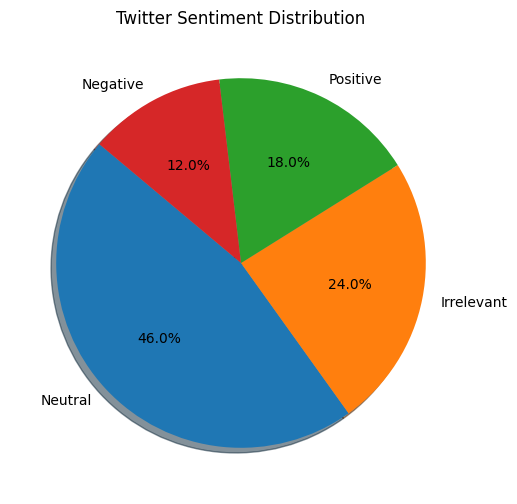

In [215]:
import matplotlib.pyplot as plt

df = twitter_analysis(twitter_data.tweet)

sentiment_counts = df['Sentiments'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        shadow=True)
plt.title('Twitter Sentiment Distribution')
plt.show()


In [ ]:
query_input = input('Typr query: ')
tweets = client.search_recent_tweets(query=f'{query_input} -is:retweet lang:en',max_results=50)
tweet_list = []
for t in tweets.data:
    id_num = t.id
    text = t.text
    tweet_list.append([id_num,text])
import pandas as pd
twitter_data = pd.DataFrame(tweet_list,columns=['id','tweet'])

def twitter_analysis(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = tweet.lower()
        tweet = re.sub(r'http\S+', '', tweet)
        tweet = re.sub(r'@\w+', '', tweet)
        tweet = re.sub(r'[^a-z\s]', '', tweet)
        tweet = ' '.join([lemm.lemmatize(l) for l in tweet.split()])
        cleaned_tweets.append(tweet)

    pre_tweets = tfidf.transform(cleaned_tweets)
    sentiment_tweet = lr.predict(pre_tweets)
    sentiment_label_tweet = le.inverse_transform(sentiment_tweet)
    result = list(zip(tweets,sentiment_label_tweet))
    #result_data = pd.DataFrame(result,columns=['Tweet','Sentiments'])
    return result

twitter_analysis(twitter_data.tweet)